# Data Augmentation
A common strategy for training neural networks is to introduce randomness in the input data itself. For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

You can import from torchvision the transforms module:




In [ ]:
from torchvision import transforms

Some of the operation you can do with it:
    
- Random rotations: `transforms.RandomRotation(degrees)` will perform random rotations of your images 
    The `degrees` parameter is a range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).

- Random resize or crop: `torchvision.transforms.RandomResizedCrop(size)`. Crop the given image to random size and aspect ratio. If size is an int, you will get a square image.

- Random Horizontal flip: `transforms.RandomHorizontalFlip()` randomly horizontally flip the images.

The rest of the available transformations is [here](https://pytorch.org/docs/stable/torchvision/transforms.html) .


You can also compose these transformation using:



```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

You'll also typically want to normalize images with `transforms.Normalize`. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. *Without normalization, networks will tend to fail to learn.*

 When you're testing however, you'll want to use images that aren't altered (except you'll need to normalize the same way). So, for validation/test images, you'll typically just resize and crop.
 
Let's try on the MNIST dataset!

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(16),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5], 
                                                            [0.5])])

Notice that I'm using `transforms.Normalize([0.5], [0.5])])` and not `transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])` because in MNIST there are only grayscale images (so only one color channel).

Using 

```datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)```


the transformation that you have defined must be passed to the `transform` argument as above


In [ ]:
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!
/shared-libs/python3.7/py/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
images.shape

torch.Size([16, 1, 16, 16])

As you can see, the shape of the images (last two entries of the cell above) is 16x16 and not 28x28 as expected for the MNIST dataset!

<AxesSubplot:>

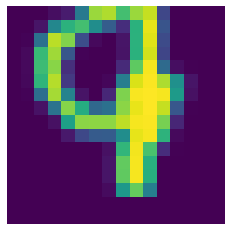

In [ ]:
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

imshow(images[0], normalize=False)

Visualizing the image you can see it has been randomly cropped as well!

You can apply these in your custom dataset as well! Just check the `ImageFolder` method of the `datasets` class in Pytorch:
    
https://pytorch.org/vision/0.8/datasets.html#imagefolder

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ccdb9771-ae37-4326-b040-1f894af2ffbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>